Import Library

In [99]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [100]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

Data Preprocessing and cleaning

In [101]:
#Open JSON file
with open('accounts.json') as f1:
    data1 = json.load(f1)

with open('transactions.json') as f2:
    data2 = json.load(f2)

In [102]:
#From accounts JSON file
join_dict = {}
for item in data1:
    account_id = str(item['account_id'])  # Convert to string
    join_dict[account_id] = item

In [103]:
#From transactions JSON file
joined_data = []
for item in data2:
    account_id = str(item['account_id'])  # Convert to string
    if account_id in join_dict:
        joined_item = {**join_dict[account_id], **item}
        joined_data.append(joined_item)

In [104]:
#Print the first 10 
for item in joined_data[:10]:
    print(item)

{'_id': {'$oid': '5ca4bbc1a2dd94ee58161cb1'}, 'account_id': {'$numberInt': '443178'}, 'limit': {'$numberInt': '10000'}, 'products': ['InvestmentStock', 'Commodity'], 'transaction_count': {'$numberInt': '66'}, 'bucket_start_date': {'$date': {'$numberLong': '-28598400000'}}, 'bucket_end_date': {'$date': {'$numberLong': '1483401600000'}}, 'transactions': [{'date': {'$date': {'$numberLong': '1063065600000'}}, 'amount': {'$numberInt': '7514'}, 'transaction_code': 'buy', 'symbol': 'adbe', 'price': '19.1072802650074180519368383102118968963623046875', 'total': '143572.1039112657392422534031'}, {'date': {'$date': {'$numberLong': '1465862400000'}}, 'amount': {'$numberInt': '9240'}, 'transaction_code': 'buy', 'symbol': 'team', 'price': '24.1525632387771480580340721644461154937744140625', 'total': '223169.6843263008480562348268'}, {'date': {'$date': {'$numberLong': '1038960000000'}}, 'amount': {'$numberInt': '2824'}, 'transaction_code': 'buy', 'symbol': 'msft', 'price': '21.04619395324543162928421

In [105]:
#Write a joined.data.json
with open('joined_data.json', 'w') as outfile:
    json.dump(joined_data, outfile, indent=4)

In [106]:
import pandas as pd
import json

# Load joined JSON data from file
with open('joined_data.json') as f:
    data = json.load(f)

# Create an empty DataFrame
df = pd.DataFrame()

# Read data in chunks from the JSON file and concatenate into the DataFrame
chunk_size = 1000  # Adjust the chunk size as needed
for i in range(0, len(data), chunk_size):
    chunk = data[i:i + chunk_size]
    df = pd.concat([df, pd.DataFrame(chunk)], ignore_index=True)

# Display the DataFrame
df


,_id,account_id,limit,products,transaction_count,bucket_start_date,bucket_end_date,transactions
0,{'$oid': '5ca4bbc1a2dd94ee58161cb1'},{'$numberInt': '443178'},{'$numberInt': '10000'},"[InvestmentStock, Commodity]",{'$numberInt': '66'},{'$date': {'$numberLong': '-28598400000'}},{'$date': {'$numberLong': '1483401600000'}},[{'date': {'$date': {'$numberLong': '106306560...
1,{'$oid': '5ca4bbc1a2dd94ee58161cb2'},{'$numberInt': '716662'},{'$numberInt': '10000'},"[Commodity, Brokerage, InvestmentFund, Investm...",{'$numberInt': '48'},{'$date': {'$numberLong': '-241056000000'}},{'$date': {'$numberLong': '1482796800000'}},[{'date': {'$date': {'$numberLong': '120588480...
2,{'$oid': '5ca4bbc1a2dd94ee58161cb3'},{'$numberInt': '557378'},{'$numberInt': '10000'},"[InvestmentStock, Commodity, Brokerage, Curren...",{'$numberInt': '56'},{'$date': {'$numberLong': '645062400000'}},{'$date': {'$numberLong': '1478390400000'}},[{'date': {'$date': {'$numberLong': '116009280...
3,{'$oid': '5ca4bbc1a2dd94ee58161cb4'},{'$numberInt': '278603'},{'$numberInt': '10000'},"[Commodity, InvestmentStock]",{'$numberInt': '83'},{'$date': {'$numberLong': '170899200000'}},{'$date': {'$numberLong': '1483488000000'}},[{'date': {'$date': {'$numberLong': '147372480...
4,{'$oid': '5ca4bbc1a2dd94ee58161cb5'},{'$numberInt': '674364'},{'$numberInt': '10000'},[InvestmentStock],{'$numberInt': '57'},{'$date': {'$numberLong': '108777600000'}},{'$date': {'$numberLong': '1483920000000'}},[{'date': {'$date': {'$numberLong': '140927040...
...,...,...,...,...,...,...,...,...
995,{'$oid': '5ca4bbc1a2dd94ee58162097'},{'$numberInt': '845284'},{'$numberInt': '10000'},"[Brokerage, InvestmentStock]",{'$numberInt': '100'},{'$date': {'$numberLong': '67305600000'}},{'$date': {'$numberLong': '1483747200000'}},[{'date': {'$date': {'$numberLong': '892771200...
996,{'$oid': '5ca4bbc1a2dd94ee58162098'},{'$numberInt': '884822'},{'$numberInt': '10000'},"[InvestmentStock, Commodity]",{'$numberInt': '32'},{'$date': {'$numberLong': '-82252800000'}},{'$date': {'$numberLong': '1483660800000'}},[{'date': {'$date': {'$numberLong': '142646400...
997,{'$oid': '5ca4bbc1a2dd94ee58162099'},{'$numberInt': '238662'},{'$numberInt': '10000'},"[Derivatives, Commodity, InvestmentFund, Broke...",{'$numberInt': '86'},{'$date': {'$numberLong': '-239846400000'}},{'$date': {'$numberLong': '1483401600000'}},[{'date': {'$date': {'$numberLong': '106548480...
998,{'$oid': '5ca4bbc1a2dd94ee5816209a'},{'$numberInt': '585432'},{'$numberInt': '10000'},"[Derivatives, InvestmentFund, InvestmentStock]",{'$numberInt': '27'},{'$date': {'$numberLong': '528681600000'}},{'$date': {'$numberLong': '1482105600000'}},[{'date': {'$date': {'$numberLong': '147484800...


In [107]:
#Remove unwanted rows
columns_to_remove = ['bucket_start_date', 'bucket_end_date', 'transactions']
df = df.drop(columns_to_remove, axis=1)
df

,_id,account_id,limit,products,transaction_count
0,{'$oid': '5ca4bbc1a2dd94ee58161cb1'},{'$numberInt': '443178'},{'$numberInt': '10000'},"[InvestmentStock, Commodity]",{'$numberInt': '66'}
1,{'$oid': '5ca4bbc1a2dd94ee58161cb2'},{'$numberInt': '716662'},{'$numberInt': '10000'},"[Commodity, Brokerage, InvestmentFund, Investm...",{'$numberInt': '48'}
2,{'$oid': '5ca4bbc1a2dd94ee58161cb3'},{'$numberInt': '557378'},{'$numberInt': '10000'},"[InvestmentStock, Commodity, Brokerage, Curren...",{'$numberInt': '56'}
3,{'$oid': '5ca4bbc1a2dd94ee58161cb4'},{'$numberInt': '278603'},{'$numberInt': '10000'},"[Commodity, InvestmentStock]",{'$numberInt': '83'}
4,{'$oid': '5ca4bbc1a2dd94ee58161cb5'},{'$numberInt': '674364'},{'$numberInt': '10000'},[InvestmentStock],{'$numberInt': '57'}
...,...,...,...,...,...
995,{'$oid': '5ca4bbc1a2dd94ee58162097'},{'$numberInt': '845284'},{'$numberInt': '10000'},"[Brokerage, InvestmentStock]",{'$numberInt': '100'}
996,{'$oid': '5ca4bbc1a2dd94ee58162098'},{'$numberInt': '884822'},{'$numberInt': '10000'},"[InvestmentStock, Commodity]",{'$numberInt': '32'}
997,{'$oid': '5ca4bbc1a2dd94ee58162099'},{'$numberInt': '238662'},{'$numberInt': '10000'},"[Derivatives, Commodity, InvestmentFund, Broke...",{'$numberInt': '86'}
998,{'$oid': '5ca4bbc1a2dd94ee5816209a'},{'$numberInt': '585432'},{'$numberInt': '10000'},"[Derivatives, InvestmentFund, InvestmentStock]",{'$numberInt': '27'}


In [108]:
df['_id'] = df['_id'].str['$oid']
df

,_id,account_id,limit,products,transaction_count
0,5ca4bbc1a2dd94ee58161cb1,{'$numberInt': '443178'},{'$numberInt': '10000'},"[InvestmentStock, Commodity]",{'$numberInt': '66'}
1,5ca4bbc1a2dd94ee58161cb2,{'$numberInt': '716662'},{'$numberInt': '10000'},"[Commodity, Brokerage, InvestmentFund, Investm...",{'$numberInt': '48'}
2,5ca4bbc1a2dd94ee58161cb3,{'$numberInt': '557378'},{'$numberInt': '10000'},"[InvestmentStock, Commodity, Brokerage, Curren...",{'$numberInt': '56'}
3,5ca4bbc1a2dd94ee58161cb4,{'$numberInt': '278603'},{'$numberInt': '10000'},"[Commodity, InvestmentStock]",{'$numberInt': '83'}
4,5ca4bbc1a2dd94ee58161cb5,{'$numberInt': '674364'},{'$numberInt': '10000'},[InvestmentStock],{'$numberInt': '57'}
...,...,...,...,...,...
995,5ca4bbc1a2dd94ee58162097,{'$numberInt': '845284'},{'$numberInt': '10000'},"[Brokerage, InvestmentStock]",{'$numberInt': '100'}
996,5ca4bbc1a2dd94ee58162098,{'$numberInt': '884822'},{'$numberInt': '10000'},"[InvestmentStock, Commodity]",{'$numberInt': '32'}
997,5ca4bbc1a2dd94ee58162099,{'$numberInt': '238662'},{'$numberInt': '10000'},"[Derivatives, Commodity, InvestmentFund, Broke...",{'$numberInt': '86'}
998,5ca4bbc1a2dd94ee5816209a,{'$numberInt': '585432'},{'$numberInt': '10000'},"[Derivatives, InvestmentFund, InvestmentStock]",{'$numberInt': '27'}


In [109]:
df['account_id'] = df['account_id'].str['$numberInt']
df

,_id,account_id,limit,products,transaction_count
0,5ca4bbc1a2dd94ee58161cb1,443178,{'$numberInt': '10000'},"[InvestmentStock, Commodity]",{'$numberInt': '66'}
1,5ca4bbc1a2dd94ee58161cb2,716662,{'$numberInt': '10000'},"[Commodity, Brokerage, InvestmentFund, Investm...",{'$numberInt': '48'}
2,5ca4bbc1a2dd94ee58161cb3,557378,{'$numberInt': '10000'},"[InvestmentStock, Commodity, Brokerage, Curren...",{'$numberInt': '56'}
3,5ca4bbc1a2dd94ee58161cb4,278603,{'$numberInt': '10000'},"[Commodity, InvestmentStock]",{'$numberInt': '83'}
4,5ca4bbc1a2dd94ee58161cb5,674364,{'$numberInt': '10000'},[InvestmentStock],{'$numberInt': '57'}
...,...,...,...,...,...
995,5ca4bbc1a2dd94ee58162097,845284,{'$numberInt': '10000'},"[Brokerage, InvestmentStock]",{'$numberInt': '100'}
996,5ca4bbc1a2dd94ee58162098,884822,{'$numberInt': '10000'},"[InvestmentStock, Commodity]",{'$numberInt': '32'}
997,5ca4bbc1a2dd94ee58162099,238662,{'$numberInt': '10000'},"[Derivatives, Commodity, InvestmentFund, Broke...",{'$numberInt': '86'}
998,5ca4bbc1a2dd94ee5816209a,585432,{'$numberInt': '10000'},"[Derivatives, InvestmentFund, InvestmentStock]",{'$numberInt': '27'}


In [110]:
df['limit'] = df['limit'].str['$numberInt']
df

,_id,account_id,limit,products,transaction_count
0,5ca4bbc1a2dd94ee58161cb1,443178,10000,"[InvestmentStock, Commodity]",{'$numberInt': '66'}
1,5ca4bbc1a2dd94ee58161cb2,716662,10000,"[Commodity, Brokerage, InvestmentFund, Investm...",{'$numberInt': '48'}
2,5ca4bbc1a2dd94ee58161cb3,557378,10000,"[InvestmentStock, Commodity, Brokerage, Curren...",{'$numberInt': '56'}
3,5ca4bbc1a2dd94ee58161cb4,278603,10000,"[Commodity, InvestmentStock]",{'$numberInt': '83'}
4,5ca4bbc1a2dd94ee58161cb5,674364,10000,[InvestmentStock],{'$numberInt': '57'}
...,...,...,...,...,...
995,5ca4bbc1a2dd94ee58162097,845284,10000,"[Brokerage, InvestmentStock]",{'$numberInt': '100'}
996,5ca4bbc1a2dd94ee58162098,884822,10000,"[InvestmentStock, Commodity]",{'$numberInt': '32'}
997,5ca4bbc1a2dd94ee58162099,238662,10000,"[Derivatives, Commodity, InvestmentFund, Broke...",{'$numberInt': '86'}
998,5ca4bbc1a2dd94ee5816209a,585432,10000,"[Derivatives, InvestmentFund, InvestmentStock]",{'$numberInt': '27'}


In [111]:
df['transaction_count'] = df['transaction_count'].str['$numberInt']
df

,_id,account_id,limit,products,transaction_count
0,5ca4bbc1a2dd94ee58161cb1,443178,10000,"[InvestmentStock, Commodity]",66
1,5ca4bbc1a2dd94ee58161cb2,716662,10000,"[Commodity, Brokerage, InvestmentFund, Investm...",48
2,5ca4bbc1a2dd94ee58161cb3,557378,10000,"[InvestmentStock, Commodity, Brokerage, Curren...",56
3,5ca4bbc1a2dd94ee58161cb4,278603,10000,"[Commodity, InvestmentStock]",83
4,5ca4bbc1a2dd94ee58161cb5,674364,10000,[InvestmentStock],57
...,...,...,...,...,...
995,5ca4bbc1a2dd94ee58162097,845284,10000,"[Brokerage, InvestmentStock]",100
996,5ca4bbc1a2dd94ee58162098,884822,10000,"[InvestmentStock, Commodity]",32
997,5ca4bbc1a2dd94ee58162099,238662,10000,"[Derivatives, Commodity, InvestmentFund, Broke...",86
998,5ca4bbc1a2dd94ee5816209a,585432,10000,"[Derivatives, InvestmentFund, InvestmentStock]",27


In [112]:
df['products'] = df['products'].astype(str).str.replace('[', '').str.replace(']', '')
df

,_id,account_id,limit,products,transaction_count
0,5ca4bbc1a2dd94ee58161cb1,443178,10000,"'InvestmentStock', 'Commodity'",66
1,5ca4bbc1a2dd94ee58161cb2,716662,10000,"'Commodity', 'Brokerage', 'InvestmentFund', 'I...",48
2,5ca4bbc1a2dd94ee58161cb3,557378,10000,"'InvestmentStock', 'Commodity', 'Brokerage', '...",56
3,5ca4bbc1a2dd94ee58161cb4,278603,10000,"'Commodity', 'InvestmentStock'",83
4,5ca4bbc1a2dd94ee58161cb5,674364,10000,'InvestmentStock',57
...,...,...,...,...,...
995,5ca4bbc1a2dd94ee58162097,845284,10000,"'Brokerage', 'InvestmentStock'",100
996,5ca4bbc1a2dd94ee58162098,884822,10000,"'InvestmentStock', 'Commodity'",32
997,5ca4bbc1a2dd94ee58162099,238662,10000,"'Derivatives', 'Commodity', 'InvestmentFund', ...",86
998,5ca4bbc1a2dd94ee5816209a,585432,10000,"'Derivatives', 'InvestmentFund', 'InvestmentSt...",27


In [113]:
#Convert from string to float
df['limit'] = df['limit'].astype(float)
df

,_id,account_id,limit,products,transaction_count
0,5ca4bbc1a2dd94ee58161cb1,443178,10000.0,"'InvestmentStock', 'Commodity'",66
1,5ca4bbc1a2dd94ee58161cb2,716662,10000.0,"'Commodity', 'Brokerage', 'InvestmentFund', 'I...",48
2,5ca4bbc1a2dd94ee58161cb3,557378,10000.0,"'InvestmentStock', 'Commodity', 'Brokerage', '...",56
3,5ca4bbc1a2dd94ee58161cb4,278603,10000.0,"'Commodity', 'InvestmentStock'",83
4,5ca4bbc1a2dd94ee58161cb5,674364,10000.0,'InvestmentStock',57
...,...,...,...,...,...
995,5ca4bbc1a2dd94ee58162097,845284,10000.0,"'Brokerage', 'InvestmentStock'",100
996,5ca4bbc1a2dd94ee58162098,884822,10000.0,"'InvestmentStock', 'Commodity'",32
997,5ca4bbc1a2dd94ee58162099,238662,10000.0,"'Derivatives', 'Commodity', 'InvestmentFund', ...",86
998,5ca4bbc1a2dd94ee5816209a,585432,10000.0,"'Derivatives', 'InvestmentFund', 'InvestmentSt...",27


In [114]:
df['transaction_count'] = df['transaction_count'].astype(float)
df

,_id,account_id,limit,products,transaction_count
0,5ca4bbc1a2dd94ee58161cb1,443178,10000.0,"'InvestmentStock', 'Commodity'",66.0
1,5ca4bbc1a2dd94ee58161cb2,716662,10000.0,"'Commodity', 'Brokerage', 'InvestmentFund', 'I...",48.0
2,5ca4bbc1a2dd94ee58161cb3,557378,10000.0,"'InvestmentStock', 'Commodity', 'Brokerage', '...",56.0
3,5ca4bbc1a2dd94ee58161cb4,278603,10000.0,"'Commodity', 'InvestmentStock'",83.0
4,5ca4bbc1a2dd94ee58161cb5,674364,10000.0,'InvestmentStock',57.0
...,...,...,...,...,...
995,5ca4bbc1a2dd94ee58162097,845284,10000.0,"'Brokerage', 'InvestmentStock'",100.0
996,5ca4bbc1a2dd94ee58162098,884822,10000.0,"'InvestmentStock', 'Commodity'",32.0
997,5ca4bbc1a2dd94ee58162099,238662,10000.0,"'Derivatives', 'Commodity', 'InvestmentFund', ...",86.0
998,5ca4bbc1a2dd94ee5816209a,585432,10000.0,"'Derivatives', 'InvestmentFund', 'InvestmentSt...",27.0


In [116]:
columns_to_remove = ['_id', 'products']
df = df.drop(columns_to_remove, axis=1)
df

,account_id,limit,transaction_count
0,443178,10000.0,66.0
1,716662,10000.0,48.0
2,557378,10000.0,56.0
3,278603,10000.0,83.0
4,674364,10000.0,57.0
...,...,...,...
995,845284,10000.0,100.0
996,884822,10000.0,32.0
997,238662,10000.0,86.0
998,585432,10000.0,27.0


Linear Regression

In [117]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [122]:
X = df.drop(columns=['limit'])  # Features (without 'limit' column)
y = df['limit']  # Target variable ('limit' column)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 169890.65444598708


In [93]:
!pip install matplotlib

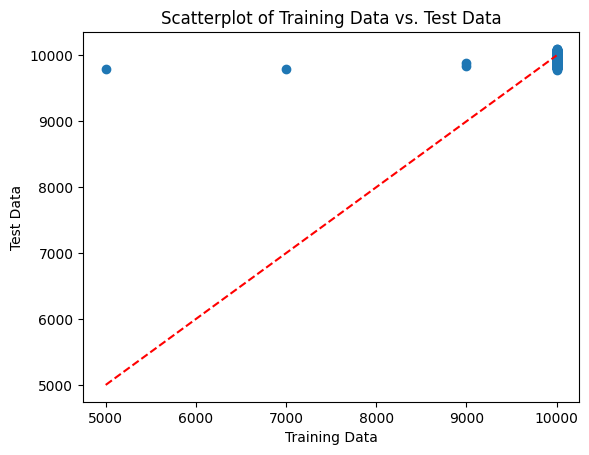

In [121]:
#Scatterplot
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)

# Add labels and title
plt.xlabel('Training Data')
plt.ylabel('Test Data')
plt.title('Scatterplot of Training Data vs. Test Data')

# Add a diagonal line representing perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')

# Display the plot
plt.show()

In [124]:
new_data = [[10000, 20000]]  # Example input data
prediction = model.predict(new_data)

# Print the predicted value
print("Predicted value:", prediction)

Predicted value: [65428.603017]


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
